# Survival Prediction After Heart Attack Using ML and Echocardiogram Data

### Brandon May

This dataset is from the UCI database describing characteristics on an echocardiogram after someone sustained a heart attack (MI - myocardial infarction) and their survival after one year.  Echocardiograms, or more simply an ultrasound of the heart, have many different measurements and the purpose of this project was to see if certain measurements or characteristics were predictive of survival at 1 year post-MI.

__Dataset URL:__ 

[https://archive.ics.uci.edu/ml/datasets/echocardiogram](https://archive.ics.uci.edu/ml/datasets/echocardiogram)

__Source Cited:__

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Importing Dataset and Cleaning

In [51]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick
import warnings

#Disabling Warnings
warnings.filterwarnings('ignore')

In [52]:
#Loading our Echocardiogram Dataset into a Pandas Dataframe.
df = pd.read_csv("echocardiogram.csv")

#Viewing our Dataframe
df

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


There are 133 data points and 13 variables including the target variable.

### Description of the Variables in the Dataframe ###

__Survival (in Months):__  Numerical

__Alive:__ Categorical (0 or 1)

__Age in Years When Heart Attack Occurred:__ Numerical

__Pericardial Effusion:__  Categorical (0 or 1)

__Fractional Shortening Measurement:__ Numerical (Measurement of Contractility of Heart, higher the better)

__EPSS (E Point Septal Separation, the lower the better):__ Numerical

__Left Ventricular Diastolic Dimension (LVDD):__ Numerical

__Wall Motion Score (Score Of How Walls of Heart Move):__ Numerical (Integers)

__Wall Motion Index (Score Divided By Number of Segments Seen - Usually 12-13):__ Numerical

__Mult, Name, and Group:__ All are case identifiers and not pertinent to the Analysis

__Aliveat1:__  Categorical (Whether or Not Person Was Alive At One Year -- __Target__)

The case identifiers of this data will be dropped as well as three variables.  The survival and alive variables together created the values for the target variable so these are redundant.  Likewise, the wall motion index was derived from wall motion score so we will remove the wall motion score variables.

In [53]:
#Data Cleaning

#Dropping the mult, name, and group variables
df.drop(['mult', 'name', 'group'], axis=1, inplace = True)

#Since Alive At 1 Year is Our Target Variable and was derived form survival and alive, I will drop the survival and alive
#columns
df.drop(['survival', 'alive'], axis = 1, inplace = True)

#Since wallmotion index is also derived from the wall-motion score, I'm also going to drop the wallmotion-score column
df.drop(['wallmotion-score'], axis = 1, inplace = True)

#Viewing Dataframe Post Cleaning
df

,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-index,aliveat1
0,71.0,0.0,0.260,9.000,4.600,1.000,0.0
1,72.0,0.0,0.380,6.000,4.100,1.700,0.0
2,55.0,0.0,0.260,4.000,3.420,1.000,0.0
3,60.0,0.0,0.253,12.062,4.603,1.450,0.0
4,57.0,0.0,0.160,22.000,5.750,2.250,0.0
...,...,...,...,...,...,...,...
128,64.0,0.0,0.240,12.900,4.720,1.000,NaN
129,64.0,0.0,0.280,5.400,5.470,1.100,NaN
130,69.0,0.0,0.200,7.000,5.050,1.210,NaN
131,57.0,0.0,0.140,16.100,4.360,1.360,NaN


In [54]:
#Searching for null values
df.isnull().values.any()


True

There are null values in this dataset and will be removed for analysis.

In [55]:
#Dropping null values
df.dropna(inplace=True)
df

,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-index,aliveat1
0,71.0,0.0,0.260,9.000,4.600,1.00,0.0
1,72.0,0.0,0.380,6.000,4.100,1.70,0.0
2,55.0,0.0,0.260,4.000,3.420,1.00,0.0
3,60.0,0.0,0.253,12.062,4.603,1.45,0.0
4,57.0,0.0,0.160,22.000,5.750,2.25,0.0
...,...,...,...,...,...,...,...
105,63.0,0.0,0.300,6.900,3.520,1.51,1.0
106,59.0,0.0,0.170,14.300,5.490,1.50,0.0
107,57.0,0.0,0.228,9.700,4.290,1.00,0.0
109,78.0,0.0,0.230,40.000,6.230,1.40,1.0


The pertinent categorical variables were encoded in Python as categorical variables for further analysis and fitting to the machine learning algorithms.

In [56]:
#Encoding Alive, aliveat1, and pericardialeffusion columns as categorical variables

df['aliveat1'] = df['aliveat1'].astype('object')
df['pericardialeffusion'] = df['pericardialeffusion'].astype('object')
df['age']= df['age'].astype('int64')

#Checking datatypes to make sure they are correct
df.dtypes

age                       int64
pericardialeffusion      object
fractionalshortening    float64
epss                    float64
lvdd                    float64
wallmotion-index        float64
aliveat1                 object
dtype: object

In [57]:
#Renaming Column Variables For Simplicity
alive = df['aliveat1']
pe = df['pericardialeffusion']

Columns were also renamed for simplicity.

In [58]:
df

,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-index,aliveat1
0,71,0,0.260,9.000,4.600,1.00,0
1,72,0,0.380,6.000,4.100,1.70,0
2,55,0,0.260,4.000,3.420,1.00,0
3,60,0,0.253,12.062,4.603,1.45,0
4,57,0,0.160,22.000,5.750,2.25,0
...,...,...,...,...,...,...,...
105,63,0,0.300,6.900,3.520,1.51,1
106,59,0,0.170,14.300,5.490,1.50,0
107,57,0,0.228,9.700,4.290,1.00,0
109,78,0,0.230,40.000,6.230,1.40,1


## Data Exploration and Analysis

A descriptive analysis was done on both the numerical and categorical variables.

In [59]:
print('Description of Data')
df.describe()

Description of Data


,age,fractionalshortening,epss,lvdd,wallmotion-index
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,64.419355,0.218452,12.307387,4.817129,1.406403
std,8.639498,0.106001,7.305048,0.774996,0.445460
min,46.000000,0.010000,0.000000,3.420000,1.000000
25%,58.250000,0.150000,8.125000,4.290000,1.000000
50%,62.000000,0.218500,11.000000,4.601500,1.321500
75%,70.000000,0.267500,15.900000,5.422500,1.625000
max,86.000000,0.610000,40.000000,6.730000,3.000000


The youngest person in the analysis was 46 years old which is young for someone to sustain a heart attack.  The oldest was 86 years old and the average age was 64 years old.

The left ventricular diastolic dimension mean was 4.8 which is within normal range.  The largest was 6.73 cm which is very large.  The minimum was 3.42 though there is less of a concern with the lower LVIDD as there is with elevated ones.

The higher the level of fractional shortening is the better.  The minimum was very low at 0.01 and the largest was 0.61.  Mean values are around 0.21.

IndexError: list index out of range

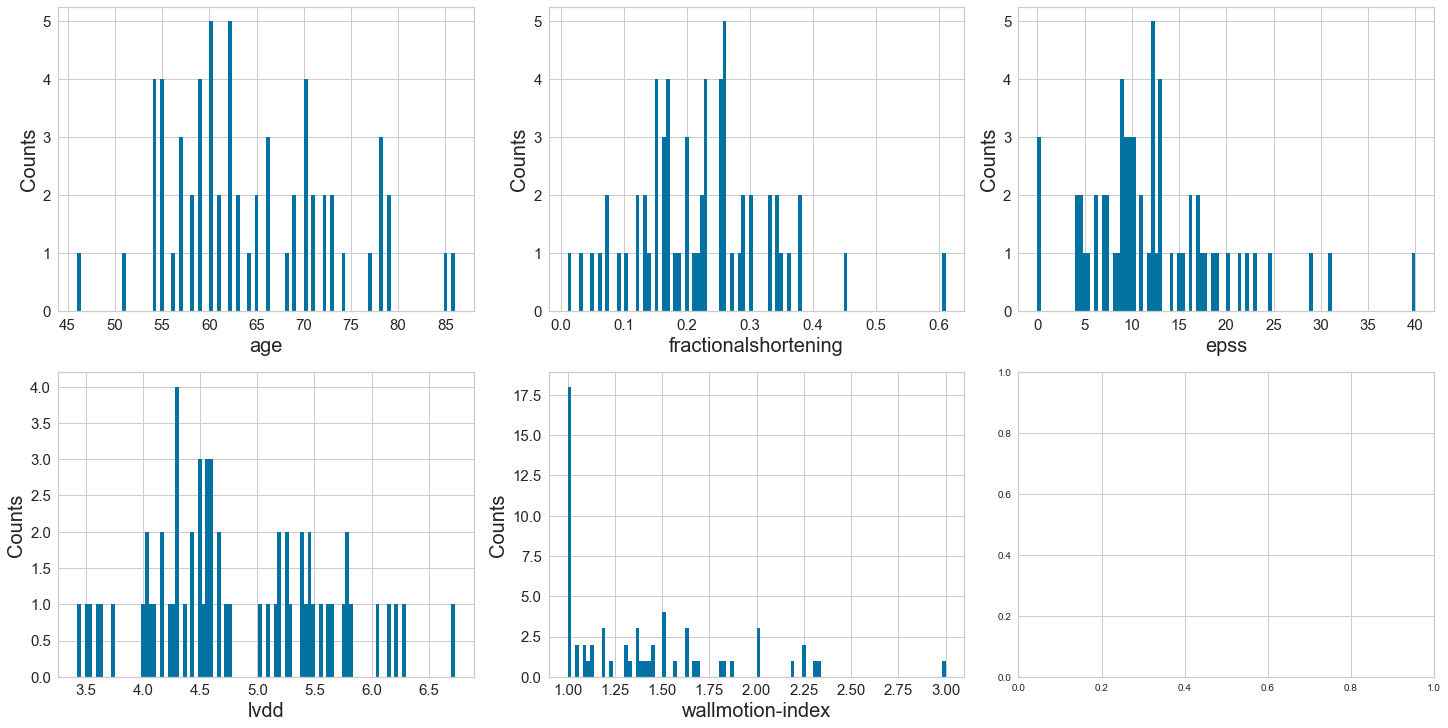

In [60]:
#Checking Variable Distributions

#Setting Figure Size
plt.rcParams['figure.figsize']= (20,10)

#Initiating Our Subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, constrained_layout = True)

#Identifying Numerical Features of Interest (Age, Fractional Shortening, EPSS, LVDD, Wall-Motion Score, and Wall-Motion 
#Index)
num_features = ['age', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-index']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts']

#Histogram Creation
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]], bins = 100)
    ax.set_xlabel(xaxes[idx], fontsize = 20)
    ax.set_ylabel(yaxes[idx], fontsize = 20)
    ax.tick_params(axis='both', labelsize = 15)
plt.show()

__Age at heart attack and fractional shortening appear to be normally distributed.  The variables of epss, lvdd, and wallmotionindex appear to be positively skewed.__  

In [ ]:
#Checking Categorical Variables Explicitly
df.describe(include=['O'])

The majority of people in the study group did not have a pericardial effusion.  Those with pericardial effusions are higher cardiac risk so this is a favorable thing.

The majority of people in the study were alive after their heart attack.

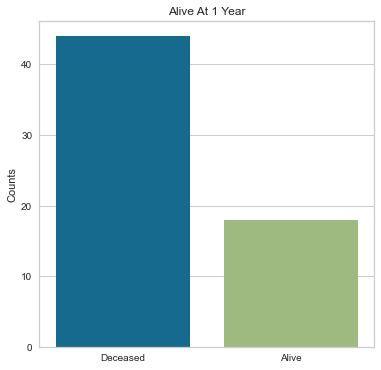

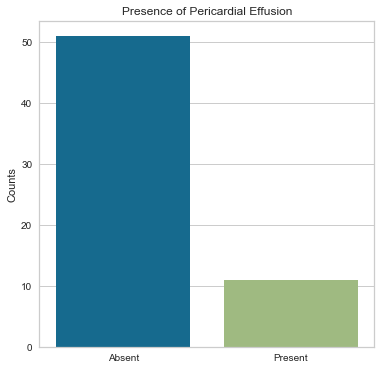

In [61]:
#Setting Up Barcharts of Our Categorical Variables (Alive, Alive at 1 Year, and Pericardial Effusion Presence) using 
#Seaborn

#Importing Seaborn
import seaborn as sns

#Plotting Survival at 1 Year with Seaborn and specifying parameters with matplotlib
plt.rcParams['figure.figsize'] = (6,6)
sns.countplot(x = 'aliveat1', data =df)
plt.title('Alive At 1 Year')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Deceased', 'Alive'])
plt.ylabel('Counts')
plt.show()


#Plotting Presence of Pericardial Effusion with seaborna and specifying parameters with matplotlib
sns.countplot(x = 'pericardialeffusion', data = df)
plt.title('Presence of Pericardial Effusion')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Absent', 'Present'])
plt.ylabel('Counts')
plt.show()

The numerical variables were analyzed for high levels of correlation (>0.90) and plotted using a correlation plot with the seaborn package.

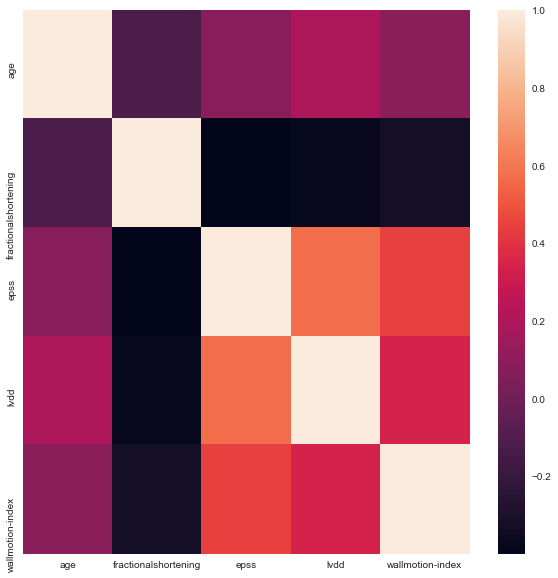

In [62]:
#Checking for correlation
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

#Importing Seaborn
import seaborn as sns

#Checking Correlation Matrix
corr_matrix = df.corr()

#Visualizing Correlation Matrix As Heatmap
sns.heatmap(corr_matrix)
plt.show()

Based on the above correlation plot, EPSS and LVDD appear to be positively correlated as do EPSS and wallmotion-index.  LVDD and wallmotion index appear to be positively correlated as well.  Age and fractional shortening appear to be slightly negatively correlated.

In [63]:
#Checking for Highly Correlated Features For Validation
corr_matrix = df.corr()
corr_matrix

,age,fractionalshortening,epss,lvdd,wallmotion-index
age,1.000000,-0.116029,0.079404,0.199105,0.086844
fractionalshortening,-0.116029,1.000000,-0.399324,-0.369920,-0.327916
epss,0.079404,-0.399324,1.000000,0.569668,0.442790
lvdd,0.199105,-0.369920,0.569668,1.000000,0.339077
wallmotion-index,0.086844,-0.327916,0.442790,0.339077,1.000000


Given these variables, none are significantly highly correlated that could prove problems in future
data analysis (correlation value of 0.95 or above).

In [64]:
#Setting Up Scatterplots for the Numerical Variables and Encoding Variables For Easier Use in Matplotlib
age = df['age']
lvdd = df['lvdd']
epss = df['epss']
fracshort = df['fractionalshortening']
wmi = df['wallmotion-index']

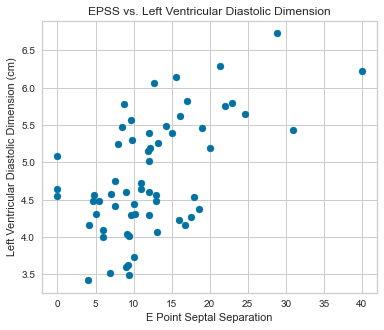

In [65]:
#Scatterplot for EPSS and Left Ventricular Diastolic Dimension
plt.rcParams['figure.figsize'] = (6,5)
plt.scatter(epss, lvdd)
plt.xlabel('E Point Septal Separation')
plt.ylabel('Left Ventricular Diastolic Dimension (cm)')
plt.title('EPSS vs. Left Ventricular Diastolic Dimension')
plt.show()

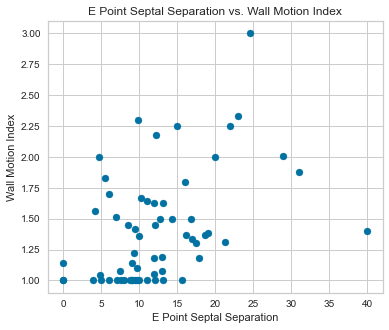

In [66]:
#Plotting EPSS vs. Wall Motion Index
plt.rcParams['figure.figsize'] = (6,5)
plt.scatter(epss, wmi)
plt.xlabel('E Point Septal Separation')
plt.ylabel('Wall Motion Index')
plt.title('E Point Septal Separation vs. Wall Motion Index')
plt.show()

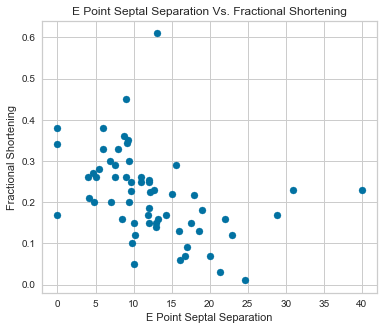

In [67]:
#Plotting EPSS vs. Fractional Shortening
plt.rcParams['figure.figsize'] = (6,5)
plt.scatter(epss, fracshort)
plt.xlabel('E Point Septal Separation')
plt.ylabel('Fractional Shortening')
plt.title('E Point Septal Separation Vs. Fractional Shortening')
plt.show()

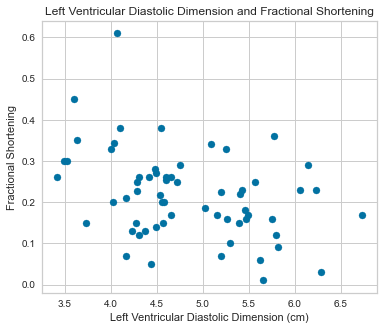

In [68]:
#Plotting LVDD vs. Fractional shortening
plt.rcParams['figure.figsize'] = (6,5)
plt.scatter(lvdd, fracshort)
plt.xlabel('Left Ventricular Diastolic Dimension (cm)')
plt.ylabel('Fractional Shortening')
plt.title('Left Ventricular Diastolic Dimension and Fractional Shortening')
plt.show()

There appeared to be a weak positive correlation between EPSS and LVDD as well as a weak negative correlation between LVDD and Fractional Shortening.

Next step was to plot our two categorical variables as stacked bar charts on top of each other to look how the presence or absence of a pericardial effusion correlated with survival.

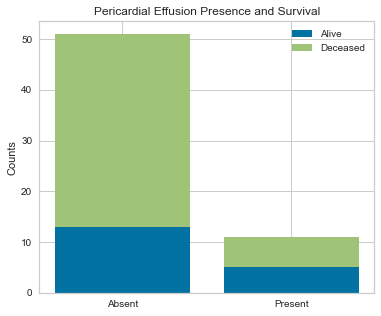

In [69]:
#Plotting stacked bar charts for our categorical variables and survival
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,5)

#Subplots
fig, axes = plt.subplots()

#Feeding Data Into Visualizer Based on Percardial Effusion Presence
pe_survived = df.replace({'aliveat1': {1: 'Alive', 0: 'Deceased'}})[df['aliveat1']==1]['pericardialeffusion'].value_counts()
pe_deceased = df.replace({'aliveat1': {1: 'Alive', 0: 'Deceased'}})[df['aliveat1']==0]['pericardialeffusion'].value_counts()
pe_deceased = pe_deceased.reindex(index=pe_survived.index)

#Making Bar Plot
p1 = plt.bar(pe_survived.index, pe_survived.values)
p2 = plt.bar(pe_deceased.index, pe_deceased.values, bottom = pe_survived.values)
plt.xticks([0,1], ['Absent', 'Present'])
plt.title('Pericardial Effusion Presence and Survival')
plt.ylabel('Counts')
plt.tick_params(axis = 'both')
plt.legend((p1[0], p2[0]), ('Alive', 'Deceased'))

plt.show()

Looking at this stacked bar chart, for those who did not have a pericardial effusion, approximately 30% were alive and 70% were deceased.  For those who did have a pericardial effusion, approximately 50% survived and 50% died.  I suspect that there may be other variables influencing this.  Pericardial effusions are an uncommon entity and usually increase the risk of death so it is counter-intuitive that those without a pericardial effusion would be dead at 1 year.

### Dimensionality Reduction and Fitting of Machine Learning Algorithms

For eventual fitting of our machine learning algorithms, pandas was used to get dummy variables for the categorical values in the dataframe.

In [70]:
#Dimensionality Reduction

#Getting Dummy Variables for Our Pericardial Effusion Variable and our Alive At 1 Variable
df = pd.get_dummies(df, drop_first=True)
df

,age,fractionalshortening,epss,lvdd,wallmotion-index,pericardialeffusion_1.0,aliveat1_1.0
0,71,0.260,9.000,4.600,1.00,0,0
1,72,0.380,6.000,4.100,1.70,0,0
2,55,0.260,4.000,3.420,1.00,0,0
3,60,0.253,12.062,4.603,1.45,0,0
4,57,0.160,22.000,5.750,2.25,0,0
...,...,...,...,...,...,...,...
105,63,0.300,6.900,3.520,1.51,0,1
106,59,0.170,14.300,5.490,1.50,0,0
107,57,0.228,9.700,4.290,1.00,0,0
109,78,0.230,40.000,6.230,1.40,0,1


In [71]:
#Using Feature Selection to Eliminate Variables That Are Not Useful

#Setting our Target: Alive at 1 year
target = df['aliveat1_1.0']

#Setting all features
features = df[['age', 'pericardialeffusion_1.0','fractionalshortening', 'epss', 'lvdd', 'wallmotion-index']]

#Loading Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile

#Standardizing Our Numerical Features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Select features with 75th Percentile
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features_standardized, target)

#Show Results
print("Original Number of Features:", features.shape[1])
print("Reduced Number of Features:", features_kbest.shape[1])

#Getting the names of the columns that were kept
fvalue_selector.get_support()

Original Number of Features: 6
Reduced Number of Features: 4


array([ True, False,  True,  True, False,  True])

Based on this Boolean, it kept the variables Age, Fractional Shortening, EPSS, and Wall-Motion Index using 75th Percentile and LVDD and Pericardial Effusion should be dropped.

For fitting of our machine learning algorithms, performance will be compared between the models with all variables included and those using feature-selected variables.

### Logistic Regression Feature Selection and Model Fitting

The first model will be using logistic regression and to use RFECV to recursively eliminate features of all variables including numerical and categoricals using negative mean squared error as the scoring metric to determine which features should be kept.

In [72]:
#Importing Our Packages
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import sklearn.linear_model as lm

#Setting Our Regression and using logistic regression since this is a binary predictor
regression = lm.LogisticRegression(random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Neg Mean Squared Error
selector = RFECV(estimator=regression, step=1, cv=StratifiedKFold(10), scoring='neg_mean_squared_error')
selector.fit(features_standardized,target)
print("Optimal Number of Features: %d" % selector.n_features_)

#Visualizing which features were kept
selector.get_support()

Optimal Number of Features: 1


array([False, False, False, False, False,  True])

Using negative mean squared error as our scoring metric with logistic regression, it appears that with this feature selection, only wall-motion index should be included.

In [73]:
#Trying RFECV with Logistic Regressionto Recursively Eliminate Features of All Variables Including Numerical and 
#Categorical Variables Using Accuracy as my scoring metric

#Setting Our Regression and using logistic regression since this is a binary predictor
regression = lm.LogisticRegression(random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Neg Mean Squared Error
selector = RFECV(estimator=regression, step=1, cv=StratifiedKFold(10), scoring='accuracy')
selector.fit(features_standardized,target)

print("Optimal Number of Features: %d" % selector.n_features_)

#Visualizing which features were kept
selector.get_support()

Optimal Number of Features: 1


array([False, False, False, False, False,  True])

Likewise, using accuracy as our scoring metric with logistic regression, it appears that with this round of feature selection, only wall motion index should be included.  It does not appear that in this case that using negative mean squared error or accuracy would change the variables that were selected.

Next we'll run Stratified K Fold CV using all features with logistic regression

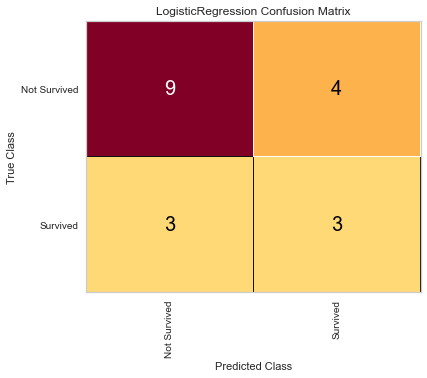

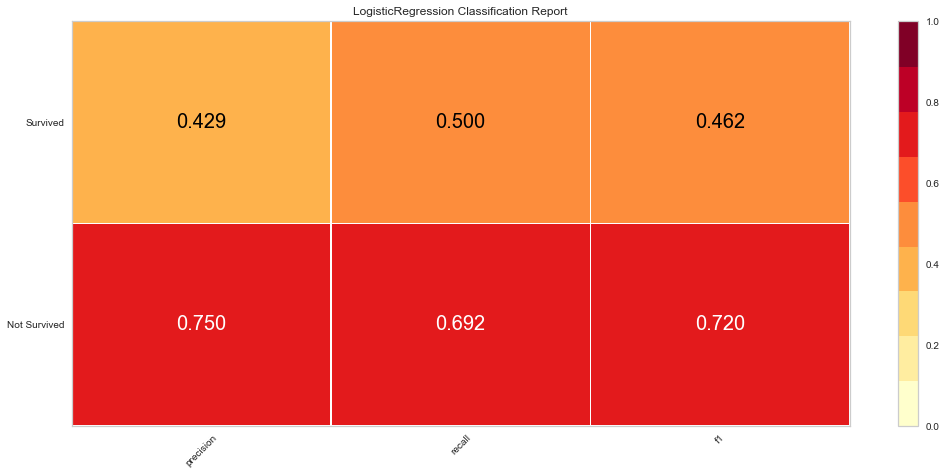

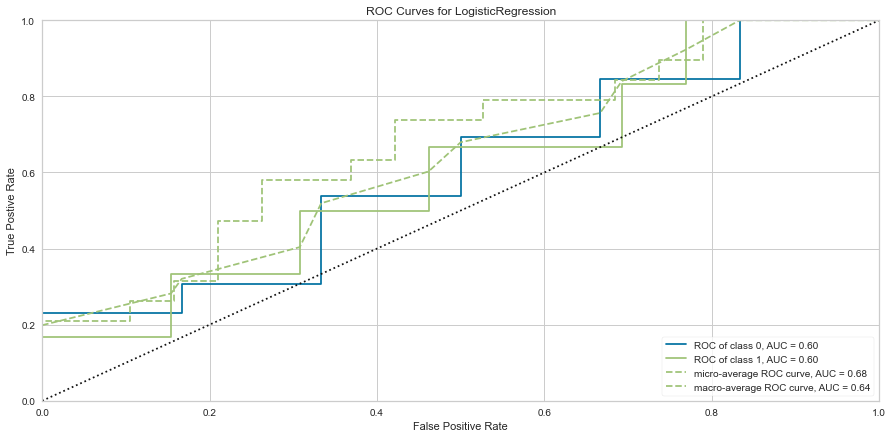

In [74]:
#Using Stratified K Fold Cross Validation, We Will Run a Logistic Regression Model Using All Features

#Importing our Packages
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Creating Standardizer
standardizer = StandardScaler()

#Creating Logistic Regression Object
logit = LogisticRegression()

#Creating K Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)

#Doing Training/Test Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 1)

#Fitting Standardizer
standardizer.fit(features_train)

#Applying to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#Creating Pipeline
pipeline = make_pipeline(standardizer, logit)

#Do K Fold Cross-Validation
cv_results = cross_val_score(pipeline, features, target, cv = kf, scoring = "accuracy", n_jobs = -1)
cv_results

#Evaluating our Metrics of Our Logistic Regression Classifier Using ALl Features

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


#Confusion Matrix Visualizer
classes = ['Not Survived', 'Survived']
cm = ConfusionMatrix(logit, classes = classes, percent = False)

#Fitting the passed model
cm.fit(features_train, target_train)

#Create confusion matrix
cm.score(features_test, target_test)

#Change fontsize of labels in figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Checking model performance?
cm.poof()

#Getting Precision, Recall, and F1 Score and ROC Curve and Setting Size of Figure/Font Size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

#Instantiate visualizer
visualizer1 = ClassificationReport(logit, classes = classes)

#Fit training data to visualizer
visualizer1.fit(features_train, target_train)

#Evaluating model on the test data
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

#ROC and AUC: Instantiating the Visualizer
visualizer2 = ROCAUC(logit)
visualizer2.fit(features_train, target_train)
visualizer2.score(features_test, target_test)
g = visualizer2.poof()

Here, the algorithm was better at predicting death than survival.  The ROC of both classes was 0.6 and the F1 scores were 0.462 for predicting survival and 0.720 for predicting death.  Next we'll run the algorithm using our feature selected variables.

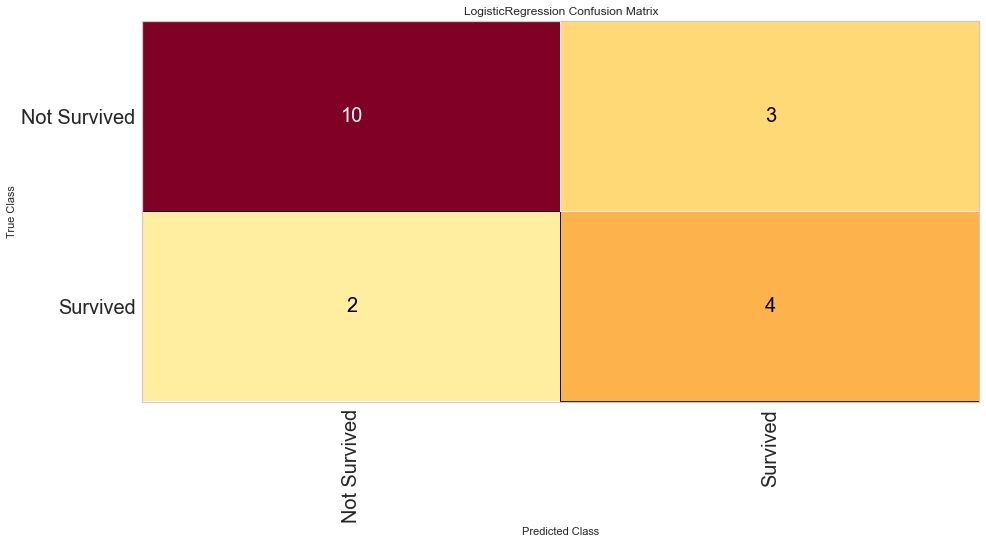

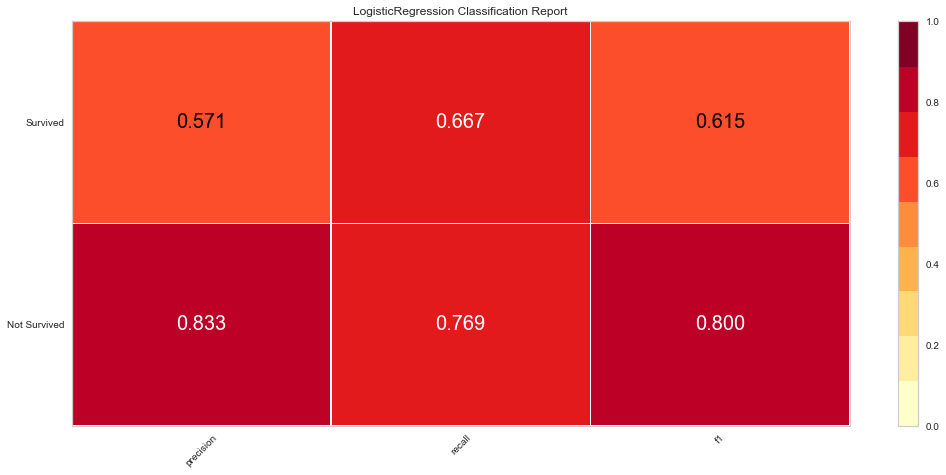

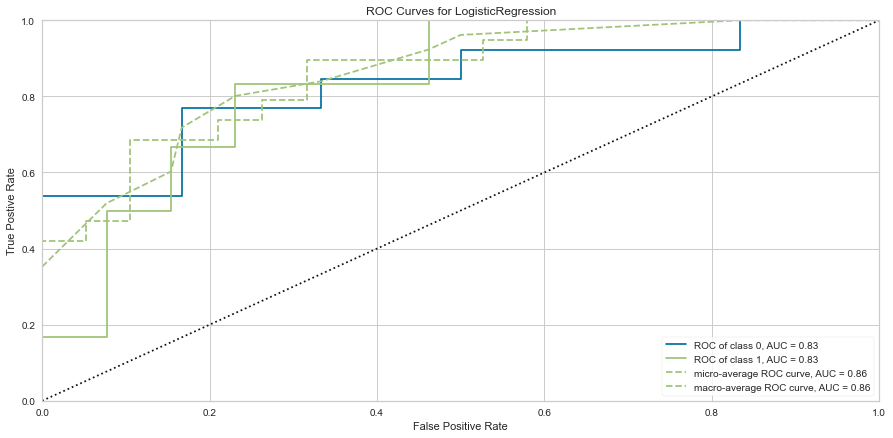

In [75]:
#Running Logistic Regression Using Our Feature Selection Result (Age and Wall Motion Index)

#Creating Standardizer
standardizer = StandardScaler()

#Creating Logistic Regression Object
logit = LogisticRegression()

#Creating K Fold Cross Validation

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)

#Setting Features
features3 = df[['age', 'wallmotion-index']]

#Doing Training/Test Split
features_train, features_test, target_train, target_test = train_test_split(features3, target, test_size=0.3, random_state = 1)

#Fitting Standardizer
standardizer.fit(features_train)

#Applying to both training and test sets

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#Creating Pipeline
pipeline = make_pipeline(standardizer, logit)

#Do K Fold Cross-Validation
cv_results = cross_val_score(pipeline, features3, target, cv = kf, scoring = "accuracy", n_jobs = -1)
cv_results

#Confusion Matrix Visualizer
classes = ['Not Survived', 'Survived']
cm = ConfusionMatrix(logit, classes = classes, percent = False)

#Fitting the passed model
cm.fit(features_train, target_train)

#Create confusion matrix
cm.score(features_test, target_test)

#Change fontsize of labels in figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Checking model performance?
cm.poof()

#Getting Precision, Recall, and F1 Score and ROC Curve and Setting size of figure and font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

#Instantiate visualizer
visualizer1 = ClassificationReport(logit, classes = classes)

#Fit training data to visualizer
visualizer1.fit(features_train, target_train)

#Evaluating model on the test data
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

#ROC and AUC: Instantiating the Visualizer
visualizer2 = ROCAUC(logit)
visualizer2.fit(features_train, target_train)
visualizer2.score(features_test, target_test)
g = visualizer2.poof()

Using our feature selected variables, the models performance improved to ROC of 0.83 for both classes.  Further the F1 score at predicting death was 0.8 and 0.615 at predicting survival.  The model still seemed to predict death more often than survival.

### Random Forest Feature Selection and Model Fitting

Using the same methodology as above, I then performed feature selection using a Random Forest Classifier with the plan to evaluate the models using all variables and then the feature selected variables.

In [76]:
#Using Random Forest Classifier as our Model with Negative Mean Squared Error as Scoring Metric

#Importing Package
from sklearn.ensemble import RandomForestClassifier

#Setting Up Our Random Forest Classifier to Call in our RFECV Function
rfc = RandomForestClassifier(n_jobs=-1, random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Neg Mean Squared Error
selector = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='neg_mean_squared_error')
selector.fit(features_standardized,target)

print("Optimal Number of Features: %d" % selector.n_features_)

selector.get_support()

Optimal Number of Features: 6


array([ True,  True,  True,  True,  True,  True])

Using this negative mean squared error as scoring, it recommended keeping all variables.

In [77]:
#Using Random Forest Classifier as our Model with Accuracy as Scoring Metric

#Setting Up Our Random Forest Classifier to Call in our RFECV Function
rfc = RandomForestClassifier(n_jobs=-1, random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Accuracy
selector = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
selector.fit(features_standardized,target)

print("Optimal Number of Features: %d" % selector.n_features_)

#Visualizing which features were kept
selector.get_support()

Optimal Number of Features: 6


array([ True,  True,  True,  True,  True,  True])

Based on this run, either using accuracy or negative mean squared error, it recommended keeping all variables in the model.

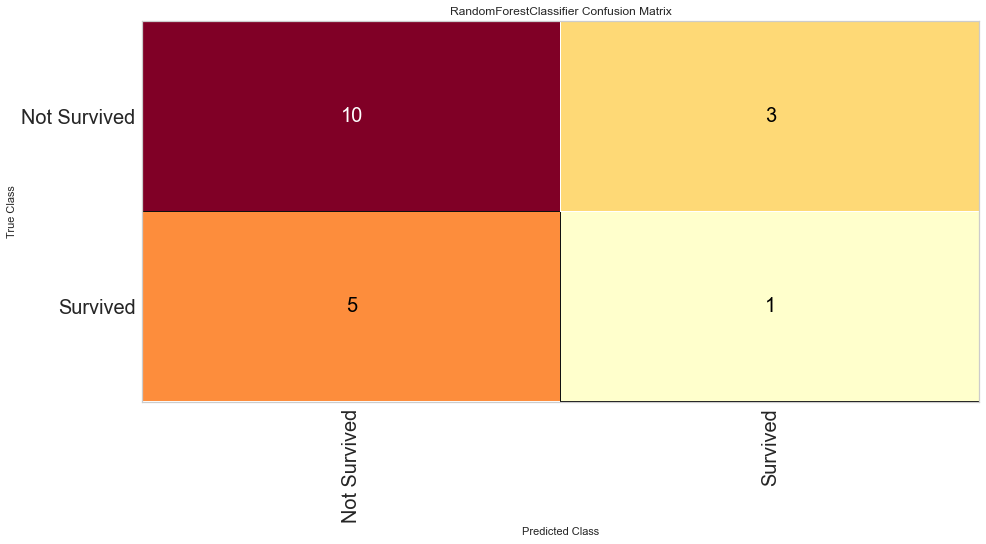

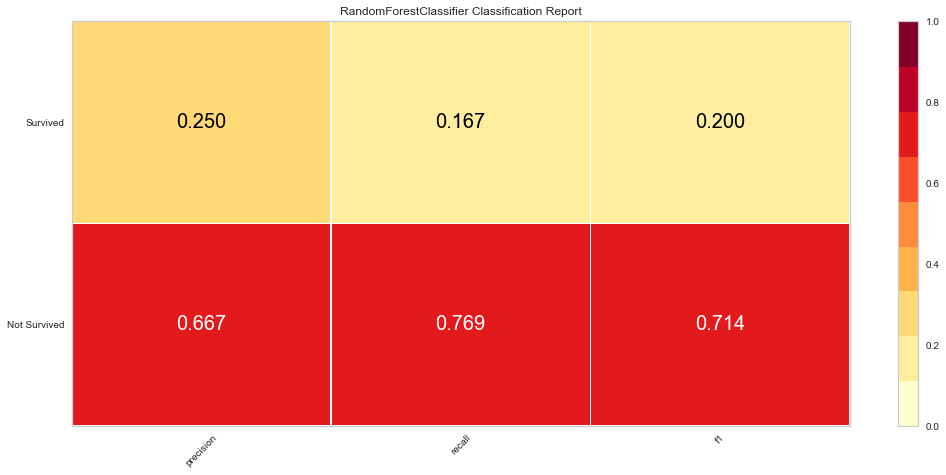

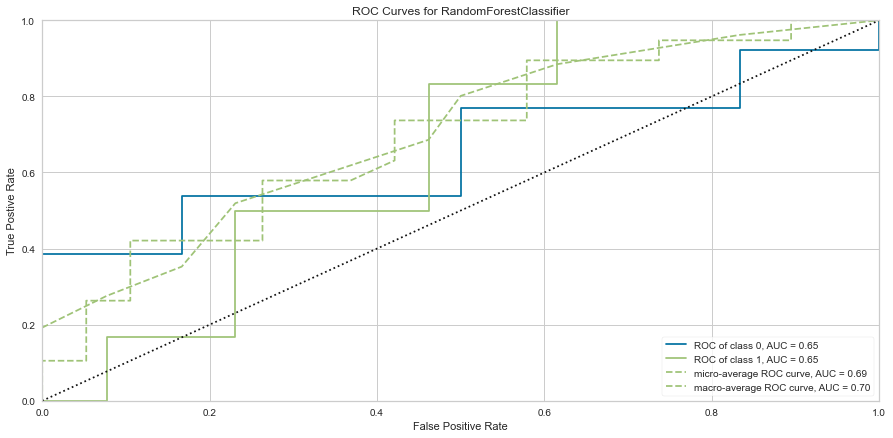

In [78]:
#Using Stratified K Fold Cross Validation, We Will Run a Random Forest Classification Model Using All Features

#Creating Standardizer
standardizer = StandardScaler()

#Creating Random Forest Object
rfc = RandomForestClassifier(random_state = 111, n_jobs = -1, class_weight = "balanced")

#Creating K Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)

#Doing Training/Test Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 1)

#Fitting Standardizer
standardizer.fit(features_train)

#Applying to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#Creating Pipeline
pipeline = make_pipeline(standardizer, rfc)

#Do K Fold Cross-Validation
cv_results = cross_val_score(pipeline, features, target, cv = kf, scoring = "accuracy", n_jobs = -1)

#Confusion Matrix Visualizer
classes = ['Not Survived', 'Survived']
cm = ConfusionMatrix(rfc, classes = classes, percent = False)

#Fitting the passed model
cm.fit(features_train, target_train)

#Create confusion matrix
cm.score(features_test, target_test)

#Change fontsize of labels in figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Checking model performance
cm.poof()

#Getting Precision, Recall, and F1 Score and ROC Curve and Setting size of figure and font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

#Instantiate visualizer
visualizer1 = ClassificationReport(rfc, classes = classes)

#Fit training data to visualizer
visualizer1.fit(features_train, target_train)

#Evaluating model on the test data
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

#ROC and AUC and Instantiating the Visualizer
visualizer2 = ROCAUC(rfc)
visualizer2.fit(features_train, target_train)
visualizer2.score(features_test, target_test)
g = visualizer2.poof()

The Random Forest model was better at predicting death than survival like the logistic regression model.  However, the ROC values were worse at 0.65 both both classes.  The F1 score for predicting death was 0.714 while it was 0.2 (very low) for predicting survival.  Since there was not much of a difference between which scoring metric used, this model was only run once using all variables.

### SVM Feature Selection

Finally, using the same methodology as above, I then performed feature selection using SVM with the plan to evaluate the models using all variables and then the feature selected variables.

In [79]:
#Trying RFECV with SVM (Support Vector Machine) to Recursively Eliminate Features of All Variables Including Numerical and 
#Categorical Variables using accuracy as my scoring metric

#Importing Our Packages
from sklearn.svm import SVC

#Setting Up SVM model
clf = SVC(kernel='linear', random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Accuracy
selector = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
selector.fit(features_standardized,target)

print("Optimal Number of Features: %d" % selector.n_features_)

#Visualizing which features were kept
selector.get_support()

Optimal Number of Features: 3


array([ True,  True, False, False, False,  True])

Given the results of this Boolean, it recommended keeping age, pericardial effusion, and wall motion index for our feature selected variables using accuracy as a metric.

In [80]:
#Trying RFECV with SVM (Support Vector Machine) to Recursively Eliminate Features of All Variables Including Numerical and 
#Categorical Variables using Negative Mean Squared Error as Scoring metric

#Setting Up SVM model
clf = SVC(kernel='linear', random_state = 1)

#Setting Our Selector for Stratified K Fold Cross validation of 10 and Using Neg Mean Squared Error
selector = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='neg_mean_squared_error')
selector.fit(features_standardized,target)

print("Optimal Number of Features: %d" % selector.n_features_)

#Visualizing which features were kept
selector.get_support()

Optimal Number of Features: 3


array([ True,  True, False, False, False,  True])

Using Support Vector Machine, feature selection identified using age, pericardialeffusion_1.0, and, wallmotion-index for our model with negative mean squared error as the metric so there is no difference between the two.

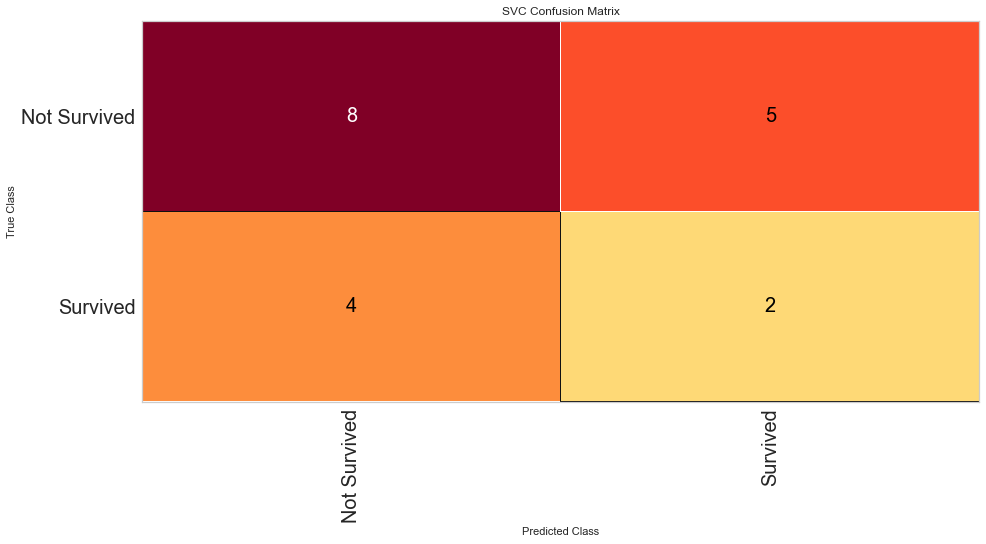

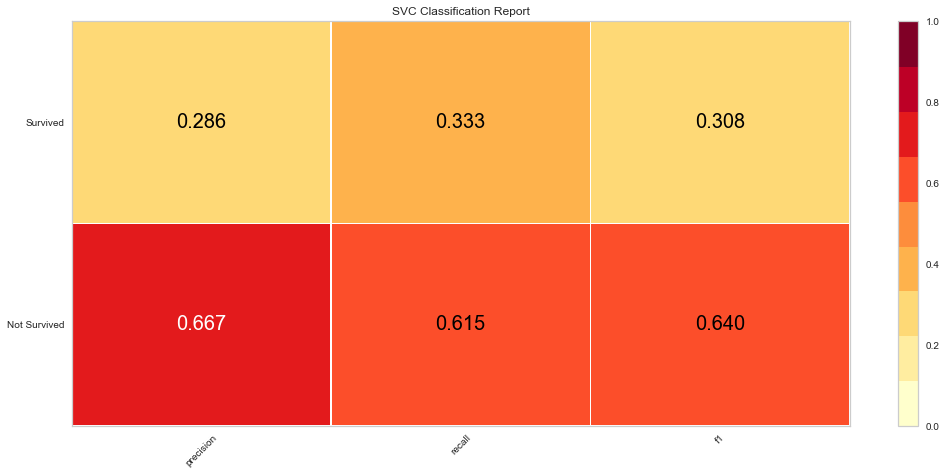

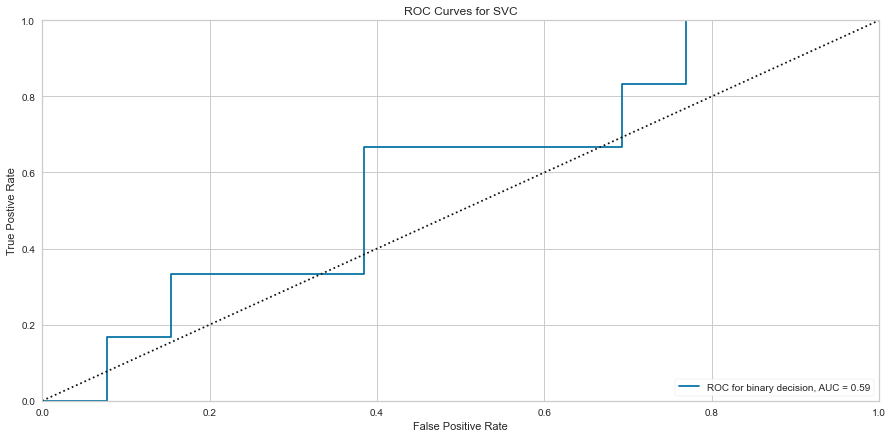

In [81]:
#Running SVM model using all variables with accuracy as scoring metric.

#Setting Our SVM Model
clf = SVC(kernel='linear')

#Creating K Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)

#Doing Training/Test Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 1)

#Fitting Standardizer
standardizer.fit(features_train)

#Applying to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#Creating Pipeline
pipeline = make_pipeline(standardizer, clf)

#Do K Fold Cross-Validation
cv_results = cross_val_score(pipeline, features, target, cv = kf, scoring = "accuracy", n_jobs = -1)


#Confusion Matrix Visualizer
classes = ['Not Survived', 'Survived']
cm = ConfusionMatrix(clf, classes = classes, percent = False)

#Fitting the passed model
cm.fit(features_train, target_train)

#Create confusion matrix
cm.score(features_test, target_test)

#Change fontsize of labels in figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Checking model performance
cm.poof()

#Getting Precision, Recall, and F1 Score and ROC Curve and Setting size of figure and font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

#Instantiate visualizer
visualizer1 = ClassificationReport(clf, classes = classes)

#Fit training data to visualizer
visualizer1.fit(features_train, target_train)

#Evaluating model on the test data
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

#ROC and AUC: Instantiating the Visualizer
visualizer1 = ROCAUC(clf, micro = False, macro = False, per_class = False)
visualizer1.fit(features_train, target_train)
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

Using this method, the F1 score was 0.640 for predicting death and 0.308 for predicting survival.  The ROC was 0.59 for the binary decision.  This is similar to the Random Forest Algorithm results.

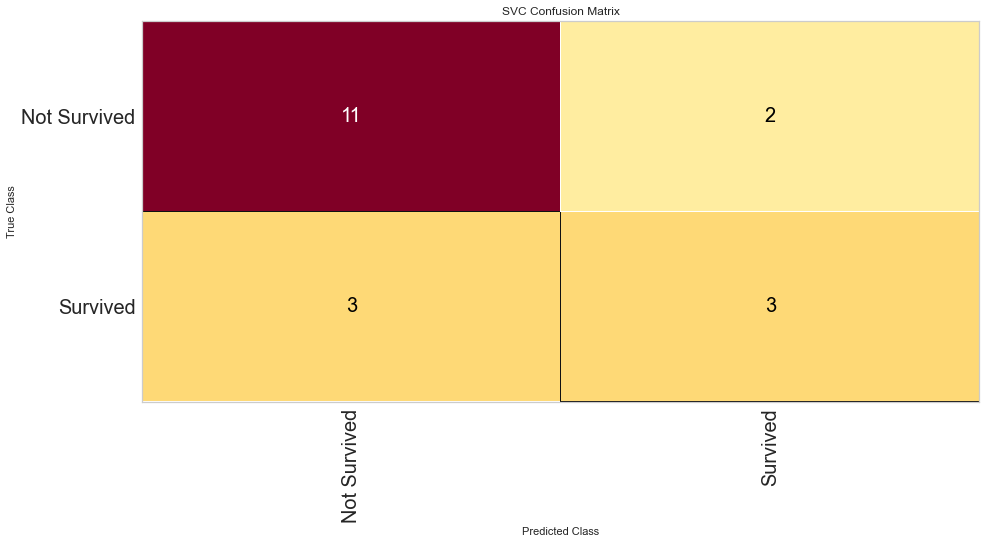

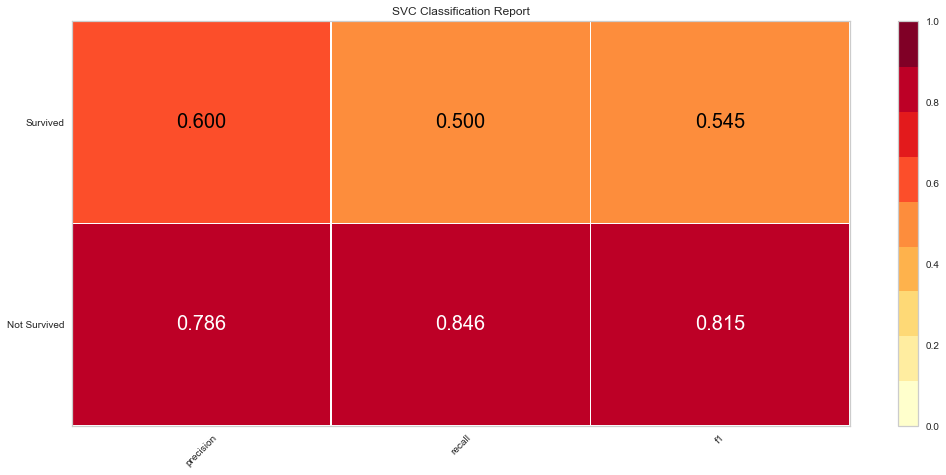

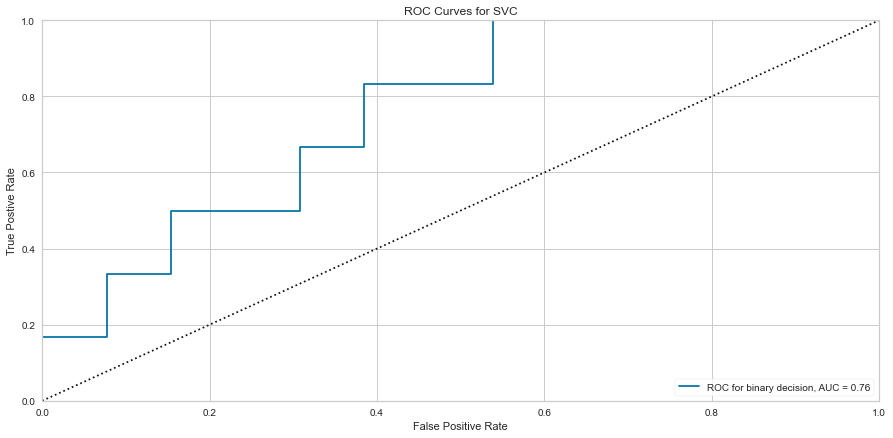

In [82]:
#Running SVM model using all variables with accuracy as scoring metric with our feature selected variables.

#Setting Our SVM Model
clf = SVC(kernel='linear')

#Creating K Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)

features4 = df[['age', 'pericardialeffusion_1.0', 'wallmotion-index']]

#Doing Training/Test Split
features_train, features_test, target_train, target_test = train_test_split(features4, target, test_size=0.3, random_state = 1)

#Fitting Standardizer
standardizer.fit(features_train)

#Applying to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#Creating Pipeline
pipeline = make_pipeline(standardizer, clf)

#Do K Fold Cross-Validation
cv_results = cross_val_score(pipeline, features4, target, cv = kf, scoring = "accuracy", n_jobs = -1)

#Confusion Matrix Visualizer
classes = ['Not Survived', 'Survived']
cm = ConfusionMatrix(clf, classes = classes, percent = False)

#Fitting the passed model
cm.fit(features_train, target_train)

#Create confusion matrix
cm.score(features_test, target_test)

#Change fontsize of labels in figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Checking model performance
cm.poof()

#Getting Precision, Recall, and F1 Score and ROC Curve and Setting size of figure and font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

#Instantiate visualizer
visualizer1 = ClassificationReport(clf, classes = classes)

#Fit training data to visualizer
visualizer1.fit(features_train, target_train)

#Evaluating model on the test data
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

#ROC and AUC: Instantiating the Visualizer
visualizer1 = ROCAUC(clf, micro = False, macro = False, per_class = False)
visualizer1.fit(features_train, target_train)
visualizer1.score(features_test, target_test)
g = visualizer1.poof()

Using the feature selected variables, the ROC improved to 0.76 and the F1 score was 0.815 for predicting death and 0.545 for predicting survival.

Overall, the best performing model overall appeared to the logistic regression model.

One limitation of this dataset is the small sample size after we removed the null values.  Another limitation of the dataset is that the deceased proportion of individuals was nearly two times those who survived in the dataset which will skew the results.  The models tend to be better here at predicting not survived vs. survived. This is likely explained by the fact that our dataset had 2 times the amount of people deceased vs. survived so there was a smaller amount of data to help predict the survived categories.

I used three different methods, Logistic Regression, Random Forest Classification, and Support Vector Machine Classification.  The best performing model was Logistic Regression followed closely by Support Vector Machines.  The Random Forest models performed the worst.  Feature selection clearly improved the results of all of the models based on their Precision, Recall, and F1 scores.

For further modeling, more data points would need to be contributed to fine tune the algorithms although the results to date are promising.